# MCO Machine Learning Technical Notebook

###### Authors: 
                Chuan Chen Chu,
                Reynaldo Delima,
                Nilo Jatico II,
                Jedwig Tan
                
##### Section: 
                STINTSY S16

## Introduction

In the topic of diseases and disabilities, having a stroke can instantly spell death or long-term disability if not immediately treated and given attention to. Characterized as either a Ishcemic Stroke or a hemorrhagic stroke, both types development from different causes but both leave similar detrimental effects to the physical and mental well-being of the afflicted. To define both types, an Ishcemic Stroke pertains to a phenoma when an artery is blocked or narrowed, resulting in a reduction in blood flow. Ischemic strokes attribute to an estimate 87% of all reported strokes(Mcintosh,2020). Hemorrhagic strokes, on the other hand, are characterized by having blood vessels in the brain become ruptured or burst entirely. A stroke can be caused by many aspects, with lifestyle issues such as smoking, drug use, drinking, obesity and medical issues such as Cardiovascular complications, high blood pressure or cholesterol, family genes being possible risks to having a stroke. Race, Gender and Age may also attribute to Stroke rates and risk(Mayo Clinic,2021). A stroke could lead to life lasting complications including Paralysis, difficulty in eating or conversing, lasting pain, mental-related problems, behavioral problems, and memory or thought related difficulties. A stroke is also very likely to cause death, especially if the afflicted is not given immediate response and medical treatment to. 

As the second leading cause of death in a study conducted in 2016 by the World Health Organization(Johnson,Onuma,Owolabi Sachdev,2016), a stroke can become fatal if not given ample attention immediately. Being able to predict if an individual is at risk of having a stroke can help the individual take steps in changing medical or lifestyle issues to help prevent the risk turning into a reality, or at the very worst case scenario, help minimize the effects of stroke and prevent life-long disabilities or death from occuring.

Given that the risks and possible causes leading to a stroke have been researched and discovered, it could be hypothesized that a machine could be able to deduce if a certain individual is suspect to be at risk of a stroke based on assessing if the individual if he/she is currently practicing or experienceing the following risks mentioned earlier in this chapter. As such, the problem that this notebook aims to tackle and accomplish is whether it is possible to create a machine capable of diagnosing if a person is suseptible to having a stroke.

### Statement of the Problem

*Is it possible to create a machine that is capable of diagnosing if a person is at risk of having a stroke?*

## Stroke Prediction Dataset

## Methodology

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
stroke_df = pd.read_csv('stroke-dataset.csv')

In [3]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Data Preprocessing

In [5]:
# Check unique values of gender and their count
stroke_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [6]:
other = stroke_df[stroke_df['gender'] == 'Other']
other

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [7]:
stroke_df = stroke_df.drop([3116])
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
stroke_df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [9]:
stroke_df['gender'] = pd.Categorical(stroke_df['gender']).codes
stroke_df['gender'].value_counts()

0    2994
1    2115
Name: gender, dtype: int64

In [10]:
stroke_df['hypertension'].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [11]:
stroke_df['heart_disease'].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [12]:
stroke_df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [13]:
stroke_df['ever_married'] = pd.Categorical(stroke_df['ever_married']).codes
stroke_df['ever_married'].value_counts()

1    3353
0    1756
Name: ever_married, dtype: int64

In [14]:
stroke_df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [15]:
stroke_df['work_type'] = pd.Categorical(stroke_df['work_type']).codes
stroke_df['work_type'].value_counts()

2    2924
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [16]:
stroke_df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [17]:
stroke_df['Residence_type'] = pd.Categorical(stroke_df['Residence_type']).codes
stroke_df['Residence_type'].value_counts()

1    2596
0    2513
Name: Residence_type, dtype: int64

In [18]:
stroke_df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [19]:
stroke_df['smoking_status'] = stroke_df['smoking_status'].replace('Unknown', np.nan)

In [20]:
stroke_df = stroke_df.dropna()

In [21]:
stroke_df['smoking_status'].value_counts()

never smoked       1852
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [22]:
stroke_df['smoking_status'] = pd.Categorical(stroke_df['smoking_status']).codes
stroke_df['smoking_status'].value_counts()

<ipython-input-22-8dd368d04f5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_df['smoking_status'] = pd.Categorical(stroke_df['smoking_status']).codes


1    1852
0     836
2     737
Name: smoking_status, dtype: int64

In [23]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,0,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,1,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,1,82.0,1,0,1,3,0,71.97,28.3,1,0
5102,45010,0,57.0,0,0,1,2,0,77.93,21.7,1,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,1,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,1,0


In [24]:
X = stroke_df.drop(columns=['id', 'stroke'])
y = stroke_df['stroke']

print(X.shape)
print(y.shape)

(3425, 10)
(3425,)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [28]:
dtc.fit(X_train, y_train)
predictions_train = dtc.predict(X_train)
print(dtc.score(X_train, y_train))

1.0


In [29]:
predictions = dtc.predict(X_test)
print(dtc.score(X_test, y_test))

0.8998054474708171


In [30]:
from sklearn import tree

tree.export_graphviz(dtc,out_file='tree.dot')  

In [33]:
print(X_train.shape)
print(y_train.shape)

(2397, 10)
(2397,)


In [34]:
print(y_train)

3558    0
3994    0
2568    0
3889    0
216     1
       ..
2014    0
4497    0
4858    0
1710    0
2410    0
Name: stroke, Length: 2397, dtype: int64


ValueError: x and y must be the same size

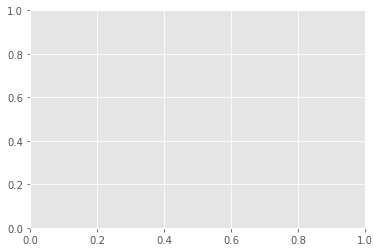

In [31]:
%matplotlib inline
plt.scatter(X_train,y_train)

## Results and Analysis

## Conclusion

## References

Johnson, W., Onuma, O., Owolabi, M., & Sachdev, S. (2016, September). Stroke: A global response is needed. Retrieved from https://www.who.int/bulletin/volumes/94/9/16-181636/en/

Holland, K. (2019, October 16). Stroke: Causes, symptoms, diagnosis, and treatment. Retrieved from https://www.medicalnewstoday.com/articles/7624

Stroke. (2021, February 09). Retrieved from https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113

##  Appendix A. Contribution of Members
